In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfS1=pd.read_excel('AirTrafficData.xlsx',sheet_name='CountrywiseQuarterly')    #DataFrame for Sheet 1 of DataSet
dfS2=pd.read_excel('AirTrafficData.xlsx',sheet_name='CitypairwiseQuarterly')   #DataFrame for Sheet 2 of DataSet  
dfS3=pd.read_excel('AirTrafficData.xlsx',sheet_name='AirlinewiseMonthly')      #DataFrame for Sheet 3 of DataSet

# Q1. Which country carry maximum number of passengers to and from India?

In [3]:
df1=dfS1[['COUNTRY NAME','PASSENGERS TO INDIA','PASSENGERS FROM INDIA']].groupby(['COUNTRY NAME'],as_index=False).sum()
mx1=df1[df1['PASSENGERS TO INDIA']==df1['PASSENGERS TO INDIA'].max()]
mx2=df1[df1['PASSENGERS FROM INDIA']==df1['PASSENGERS FROM INDIA'].max()]
c1=mx1['COUNTRY NAME'].to_string(index=False)
c2=mx2['COUNTRY NAME'].to_string(index=False)
p1=mx1['PASSENGERS TO INDIA'].to_string(index=False)
p2=mx2['PASSENGERS FROM INDIA'].to_string(index=False)
print("Country Carrying maximum number of passengers to India is {} with {} passengers".format(c1,p1))
print("Country Carrying maximum number of passengers from India is {}  with {} passengers".format(c2,p2))

Country Carrying maximum number of passengers to India is UNITED ARAB EMIRATES* with 15045602 passengers
Country Carrying maximum number of passengers from India is UNITED ARAB EMIRATES*  with 15398512 passengers


# Q2. In the year 2015, show the trend of freight from India on the basis of all months. And compare it with the trend of freight to India.

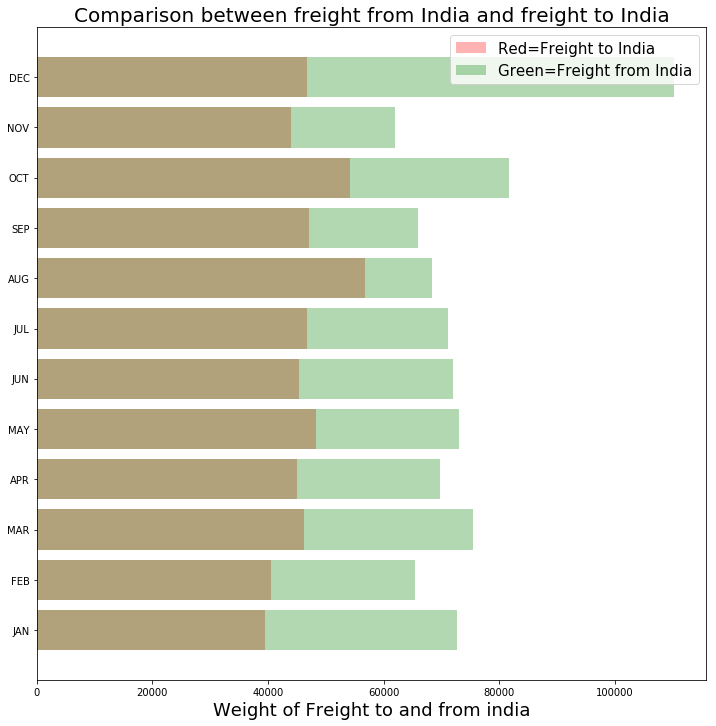

In [4]:
df2=dfS3.drop(dfS3[dfS3['YEAR']!=2015].index)
df2=df2[['MONTH','FREIGHT TO INDIA', 'FREIGHT FROM INDIA']].groupby(['MONTH'],as_index=False).sum()

months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", 
          "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

df2['MONTH'] = pd.Categorical(df2['MONTH'], categories=months, ordered=True)
df2.sort_values(by='MONTH',inplace=True)
df2=df2.reset_index(drop=True)


plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(df2['MONTH'],df2['FREIGHT TO INDIA'],alpha=0.3,color='r')
plt.barh(df2['MONTH'],df2['FREIGHT FROM INDIA'],alpha=0.3,color='g')
plt.xlabel('Weight of Freight to and from india',fontsize=18)
l=['Red=Freight to India','Green=Freight from India']
plt.legend(l,loc=1,fontsize=15)
plt.title('Comparison between freight from India and freight to India',fontsize=20)
plt.show()

# Q3. In 2015, which foreign airlines did not travel to and from India but did in the subsequent year?

In [9]:
df3=dfS3.drop(dfS3[dfS3['YEAR']==2017].index)

df31=df3.loc[ (df3['YEAR']==2015) & (df3['PASSENGERS TO INDIA']==0) & (df3['PASSENGERS FROM INDIA']==0) & (df3['FREIGHT FROM INDIA']==0) &(df3['FREIGHT FROM INDIA']==0) ]
df31=df31['AIRLINE NAME']

df32=df3.loc[ (df3['YEAR']==2016) & ((df3['PASSENGERS TO INDIA']!=0) | (df3['PASSENGERS FROM INDIA']!=0) | (df3['FREIGHT FROM INDIA']!=0) | (df3['FREIGHT FROM INDIA']!=0)) ]
df32=df32['AIRLINE NAME']

df31=set(df31)
df32=set(df32)

for i in list((df31 & df32)):
    print(i)

KOREAN AIR
AIR MANAS
SHANDONG AIRLINES
IRAQI AIRWAYS
NEPAL AIRLINES CORPORATION
MYANMAR AIRLINES
BUDHHA AIR
AEROLOGIC
BHUTAN AIRLINES
YEMENIA AIRWAYS
BRITISH AIRWAYS
DRAGON AIR
THOMAS COOK AIRLINES U.K.
TURKISH AIRLINES
AIR CANADA
AIR FRANCE
AIR AUSTRAL


# Q4. Which foreign airline flight carry maximum number of passengers to and from India?

In [6]:
df4=dfS3[['AIRLINE NAME','PASSENGERS TO INDIA','PASSENGERS FROM INDIA']].groupby(['AIRLINE NAME'],as_index=False).sum()

mx1=df4[df4['PASSENGERS TO INDIA']==df4['PASSENGERS TO INDIA'].max()]
mx2=df4[df4['PASSENGERS FROM INDIA']==df4['PASSENGERS FROM INDIA'].max()]

c1=mx1['AIRLINE NAME'].to_string(index=False)
c2=mx2['AIRLINE NAME'].to_string(index=False)
p1=mx1['PASSENGERS TO INDIA'].to_string(index=False)
p2=mx2['PASSENGERS FROM INDIA'].to_string(index=False)

print("Airline Carrying maximum number of passengers to India is {} with {} passengers".format(c1,p1))
print("Airline Carrying maximum number of passengers from India is {}  with {} passengers".format(c2,p2))

Airline Carrying maximum number of passengers to India is JET AIRWAYS with 8320544.0 passengers
Airline Carrying maximum number of passengers from India is JET AIRWAYS  with 8471096 passengers


# Q5. Which foreign airlines carries only freight to and from India but no passenger?

In [7]:
df4=dfS3[['YEAR','CARRIER TYPE','AIRLINE NAME','PASSENGERS TO INDIA','PASSENGERS FROM INDIA','FREIGHT TO INDIA','FREIGHT FROM INDIA']]
df41=df4.loc[ (df4['CARRIER TYPE']=='FOREIGN') ]
df41=df4.loc[ (df4['YEAR']==2015) & (df4['PASSENGERS TO INDIA']==0) & (df4['PASSENGERS FROM INDIA']==0) & (df4['FREIGHT FROM INDIA']!=0) &(df4['FREIGHT FROM INDIA']!=0) ]
df42=df4.loc[ (df4['YEAR']==2016) & (df4['PASSENGERS TO INDIA']==0) & (df4['PASSENGERS FROM INDIA']==0) & (df4['FREIGHT FROM INDIA']!=0) &(df4['FREIGHT FROM INDIA']!=0) ]
df43=df4.loc[ (df4['YEAR']==2017) & (df4['PASSENGERS TO INDIA']==0) & (df4['PASSENGERS FROM INDIA']==0) & (df4['FREIGHT FROM INDIA']!=0) &(df4['FREIGHT FROM INDIA']!=0) ]
df41=list(set(df41['AIRLINE NAME']))
df42=list(set(df42['AIRLINE NAME']))
df43=list(set(df43['AIRLINE NAME']))
print("Foreign airlines which carried only freight to and from India but no passenger in 2015: \n")
for i in range(0,len(df41)):
    print("{} {}".format(i+1,df41[i]))
    
print("\nForeign airlines which carried only freight to and from India but no passenger in 2016: \n")
for i in range(0,len(df42)):
    print("{} {}".format(i+1,df42[i]))
    
print("\nForeign airlines which carried only freight to and from India but no passenger in 2017: \n")
for i in range(0,len(df43)):
    print("{} {}".format(i+1,df43[i])) 

Foreign airlines which carried only freight to and from India but no passenger in 2015: 

1 FEDERAL EXPRESS
2 ETHIOPIAN AIRLINES
3 MARTIN AIR HOLLAND
4 AEROLOGIC
5 UNITED PARCEL SERVICES
6 KALITTA AIR
7 KAM AIR
8 AIR AUSTRAL

Foreign airlines which carried only freight to and from India but no passenger in 2016: 

1 FEDERAL EXPRESS
2 CARGOLUX AIRLINES INTERNATIONAL S.A.
3 AEROLOGIC
4 UNITED PARCEL SERVICES
5 KALITTA AIR

Foreign airlines which carried only freight to and from India but no passenger in 2017: 

1 CARGOLUX AIRLINES INTERNATIONAL S.A.
2 FEDERAL EXPRESS
3 AEROLOGIC
4 UNITED PARCEL SERVICES
5 KALITTA AIR


# Q6. What is the average weight of freight carried out of India in 2016. Compare it with the average weight of freight carried inside India in 2016.

# Q7. Draw a graph depicting the deviation from mean of freight carried in every quarter in 2015.

# Q8. Find the correlation between the no. of passengers and the freight.

# Q9. From which country the maximum no. of passengers travelled to India in 2015 and 2016 ? And also, to which country the maximum number of passengers travelled from India in the same years?

# Q10. Which foreign airlines did not come to and from India in the year 2015 and 2016?

In [8]:
df10=dfS3.drop(dfS3[dfS3['YEAR']==2017].index)

df101=df10.loc[ (df10['CARRIER TYPE']=="FOREIGN") &(df10['YEAR']==2015) & (df10['PASSENGERS TO INDIA']==0) & (df10['PASSENGERS FROM INDIA']==0) & (df10['FREIGHT FROM INDIA']==0) &(df10['FREIGHT FROM INDIA']==0) ]
df101=df101['AIRLINE NAME']

df102=df10.loc[ (df10['CARRIER TYPE']=="FOREIGN") & (df10['YEAR']==2016) & ((df10['PASSENGERS TO INDIA']==0) & (df10['PASSENGERS FROM INDIA']==0) & (df10['FREIGHT FROM INDIA']==0) & (df10['FREIGHT FROM INDIA']==0)) ]
df102=df102['AIRLINE NAME']

df101=set(df101)
df102=set(df102)

print("Foreign airlines that did not come to and from in 2015 : \n")
for i in list(df101):
    print(i)
    
print("\n\nForeign airlines that did not come to and from in 2016 : \n")
for i in list(df102):
    print(i)

Foreign airlines that did not come to and from in 2015 : 

AEROLOGIC
EVA AIRWAYS
BRITISH AIRWAYS
AIR CANADA
AIR MANAS
SHANDONG AIRLINES
BUDHHA AIR
TURKISH AIRLINES
AIR FRANCE
KOREAN AIR
TRANSAERO AIRLINES
IRAQI AIRWAYS
NEPAL AIRLINES CORPORATION
BHUTAN AIRLINES
YEMENIA AIRWAYS
AIR AUSTRAL
MYANMAR AIRLINES
DRAGON AIR
THOMAS COOK AIRLINES U.K.


Foreign airlines that did not come to and from in 2016 : 

NOVO AIR
UNITED AIRLINES BANGLADESH LTD.
EVA AIRWAYS
AIR MANAS
SHANDONG AIRLINES
MIHIN LANKA
BUDHHA AIR
TRANSAERO AIRLINES
AUSTRIAN AIRLINES
YEMENIA AIRWAYS
AIR ASIA X
MEGA MALDIVES AIRLINES
BUDDHA AIR
MYANMAR AIRLINES
CARGOLUX AIRLINES INTERNATIONAL S.A.
KENYA AIRWAYS
THOMAS COOK AIRLINES U.K.
SCAT AIRLINES
SCOOT PTE LTD.


# Q11. Draw a graph depicting the no. of passengers and freight carried in every quarter by the British Airways contrasting the trend in 2015 and 2016.

# Q12. Using a graph show the percentile of no. of passengers carried out of India of every airline in the year 2015.